# Check the debit_impose option of canal_perio keyword

## Introduction
Validation made by: G.F.. \
Report generated 13/04/2021

### Description 

### Parameters TRUST
* Version TRUST: 
* Binary()

### Parameters TRUST
* ./std.data 
* ./debit.data 
* ./debit2.data 
* ./debit3.data 

In [1]:
from trustutils import run 
run.addCase("." ,"std.data") 
run.addCase("." ,"debit.data") 
run.addCase("." ,"debit2.data") 
run.addCase("." ,"debit3.data") 
run.runCases()

Running **with Sserver**...
  => A total of 4 cases were (successfully) run in 3.6s.


## Comparison between flow rate specified by debitimpose op-tion and computed flow rate by the initial condition on velocity
Data files differences:

In [2]:
run.dumpData("diff_deb.out")

 76c76
 < 	 	 	 vitesse champ_uniforme 2 1. 0. 
 ---
 > 	 	 	 vitesse  champ_uniforme 2 2 0. 
 78c78
 < 	 	 sources { Canal_perio {  bord periox } }
 ---
 > 	 	 sources { Canal_perio {   bord periox debit_impose 2. } }



In the first data file, the flow rate will be 2 m3/s (Uo=1 m/s and S=2m).  In the second one, flow rate is4 m3/s, and then will decrease to 2 m3/s.

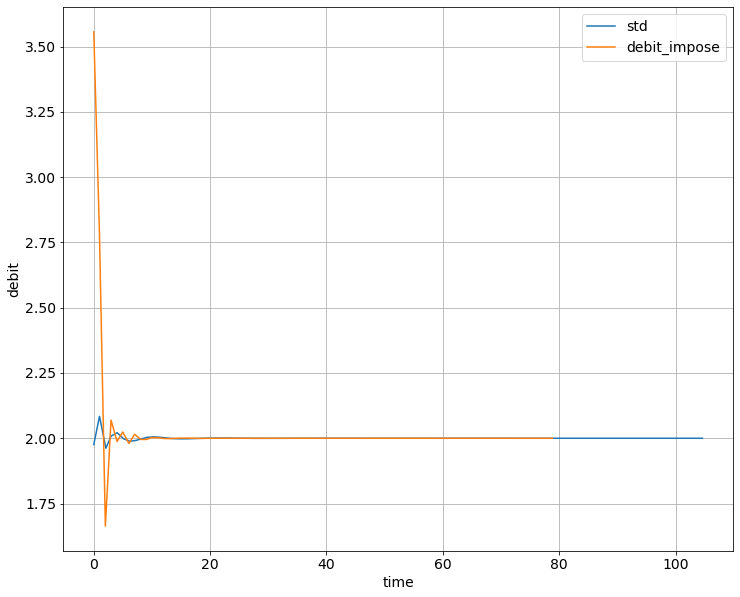

In [3]:
from trustutils import plot
import numpy as np

a = plot.Graph('')

x = plot.loadText("std_pb_Debit.out")
a.add(x[0],x[1],label="std")

x = plot.loadText("debit_pb_Debit.out")
a.add(x[0],x[1],label="debit_impose")


a.label("time","debit")
a.visu()

## Initial  velocity  is  inclined  into  2  directions,  with  a  verticalflow rate which should be 0.
When converged, the velocity profile reaches horizontality.

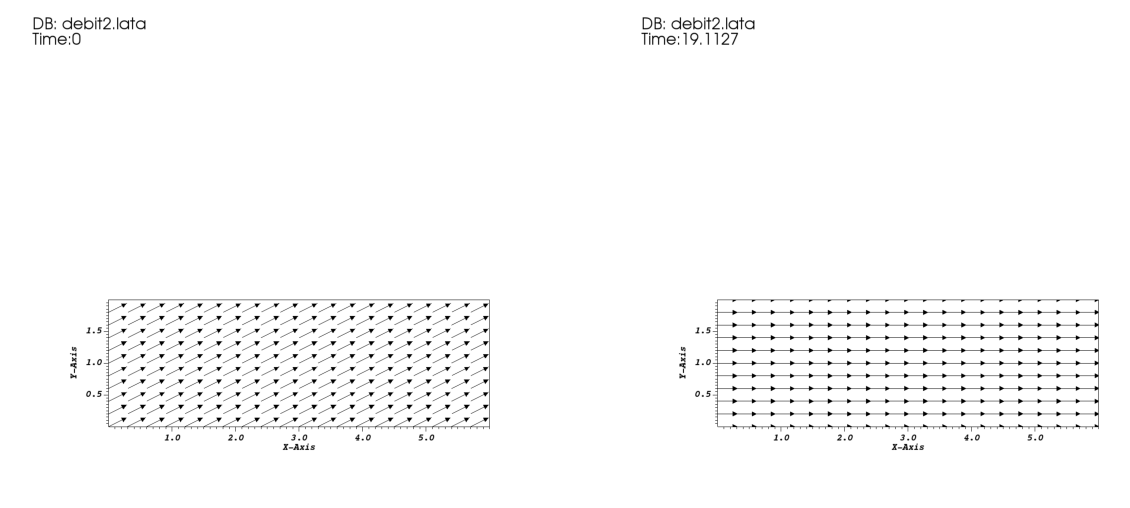

In [4]:
from trustutils import visit

Graphique=visit.Show("debit2.lata","Vector","VITESSE_SOM_dom",nY=2,time=0,plotmesh=False,color="blackvector")
Graphique.add("debit2.lata","Vector","VITESSE_SOM_dom",yIndice=1)
Graphique.plot()

## Initial  velocity  is  inclined  into  2  directions,  with  a  verticalflow rate which should be 0.
When converged, the velocity profile reaches horizontality to 4 (due to the porosity) .

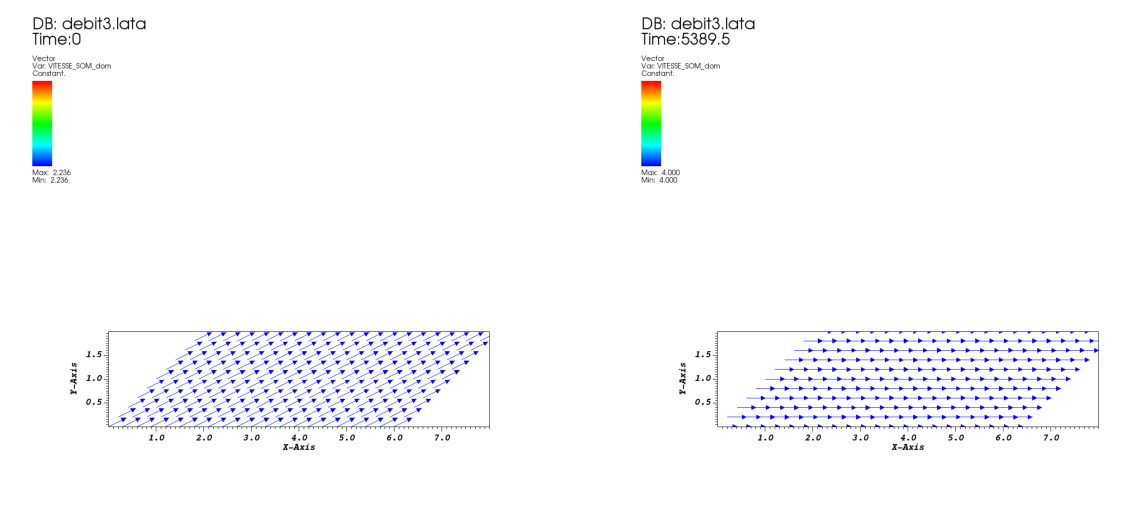

In [5]:
from trustutils import visit

Graphique=visit.Show("debit3.lata","Vector","VITESSE_SOM_dom",nY=2,time=0,plotmesh=False)
Graphique.add("debit3.lata","Vector","VITESSE_SOM_dom",yIndice=1)
Graphique.plot()